In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install numpy

In [7]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv("sabanciwdata_converted.csv")
df.head(4152)

,Time,Temp,Dwpt,Rhum,Prcp,Wdir,Wspd,Pres,Tsun,Coco
0,7/1/2024 0:00,20.9,19.2,90,0.0,50,13.0,1012.8,0,1
1,7/1/2024 1:00,20.0,19.0,94,0.0,60,14.8,1012.0,0,2
2,7/1/2024 2:00,20.0,19.0,94,0.0,60,11.2,1013.0,0,5
3,7/1/2024 3:00,19.1,18.3,95,0.0,50,13.0,1012.7,0,5
4,7/1/2024 4:00,20.0,19.0,94,0.0,50,13.0,1013.0,0,5
...,...,...,...,...,...,...,...,...,...,...
4147,12/20/2024 19:00,12.0,4.0,58,0.0,200,6.0,1010.0,0,3
4148,12/20/2024 20:00,12.0,4.9,62,0.0,240,6.0,1010.0,0,3
4149,12/20/2024 21:00,13.0,4.9,58,0.0,200,7.0,1010.0,0,3
4150,12/20/2024 22:00,12.0,4.9,62,0.0,210,6.0,1010.0,0,3


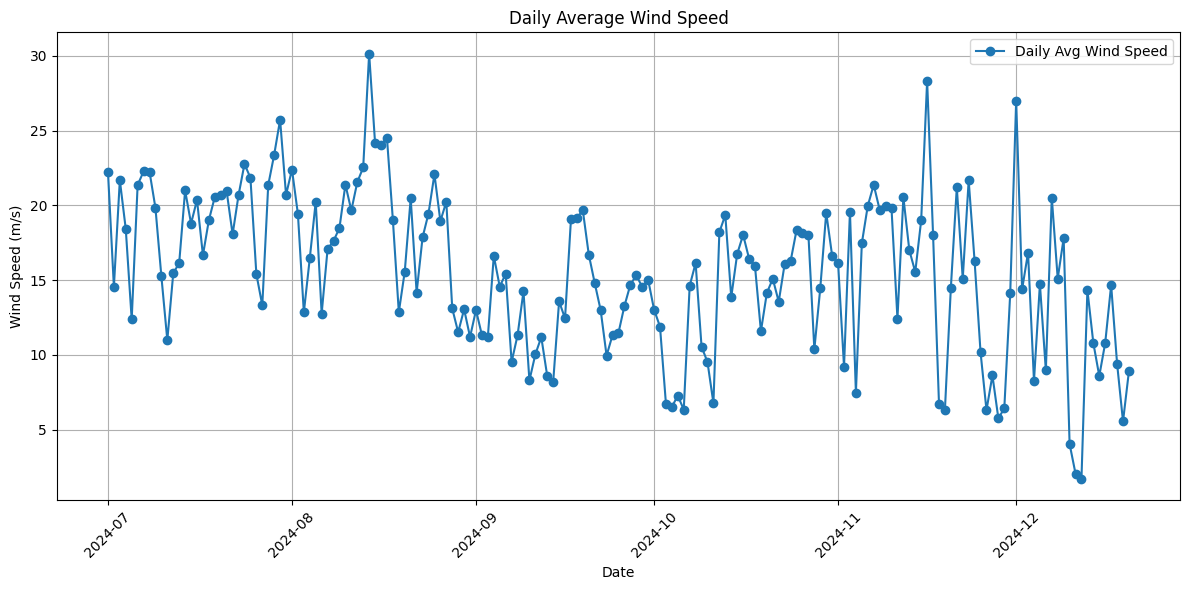

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract date and calculate daily average wind speed
df['Date'] = df['Time'].dt.date
daily_avg_wind_speed = df.groupby('Date')['Wspd'].mean()

# Plot daily average wind speed
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_wind_speed, marker='o', linestyle='-', label='Daily Avg Wind Speed')
plt.title('Daily Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

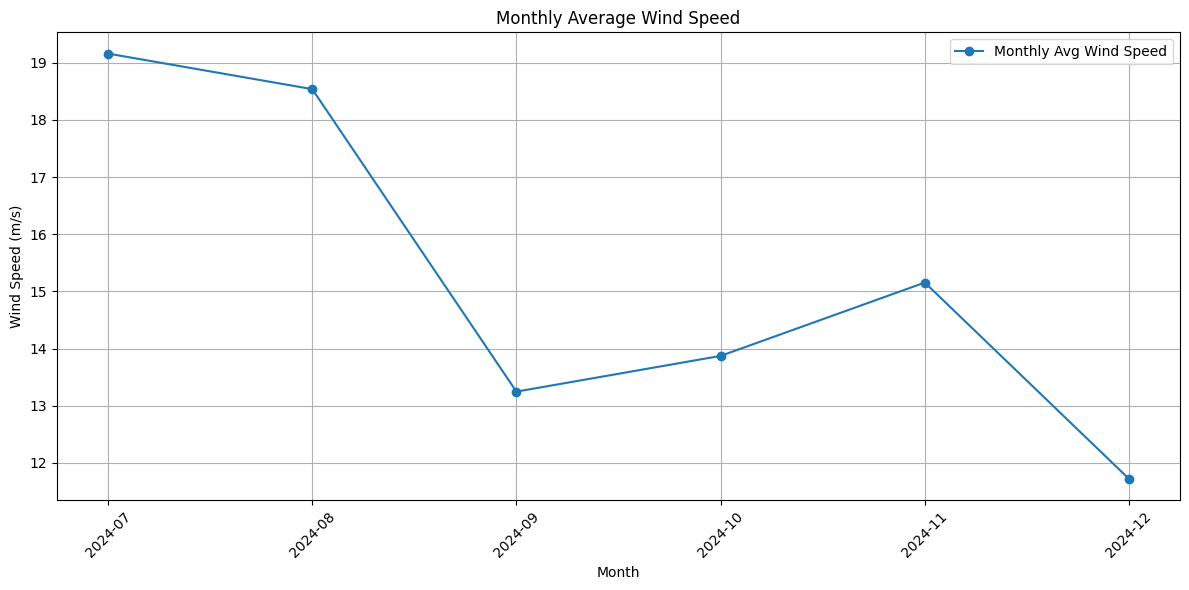

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract month and year for monthly grouping
df['YearMonth'] = df['Time'].dt.to_period('M')

# Calculate monthly average wind speed
monthly_avg_wind_speed = df.groupby('YearMonth')['Wspd'].mean()

# Plot the monthly average wind speed
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_wind_speed.index.astype(str), monthly_avg_wind_speed, marker='o', linestyle='-', label='Monthly Avg Wind Speed')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

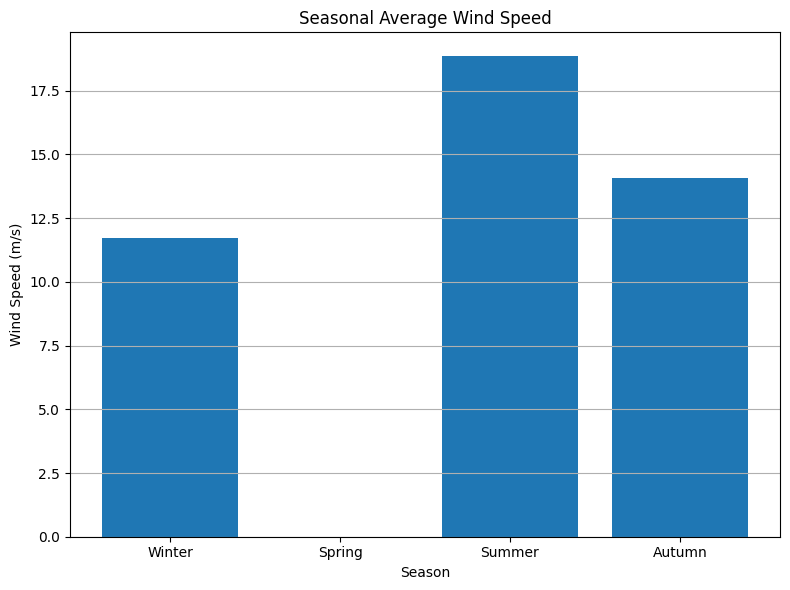

In [19]:
# Define a function to classify seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Add a 'Season' column to the dataset
df['Season'] = df['Time'].dt.month.apply(get_season)

# Calculate average wind speed for each season
seasonal_avg_wind_speed = df.groupby('Season')['Wspd'].mean()

# Sort the seasons in the typical order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_avg_wind_speed = seasonal_avg_wind_speed.reindex(season_order)

# Visualize seasonal average wind speed
plt.figure(figsize=(8, 6))
plt.bar(seasonal_avg_wind_speed.index, seasonal_avg_wind_speed)
plt.title('Seasonal Average Wind Speed')
plt.xlabel('Season')
plt.ylabel('Wind Speed (m/s)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
!pip install statsmodels

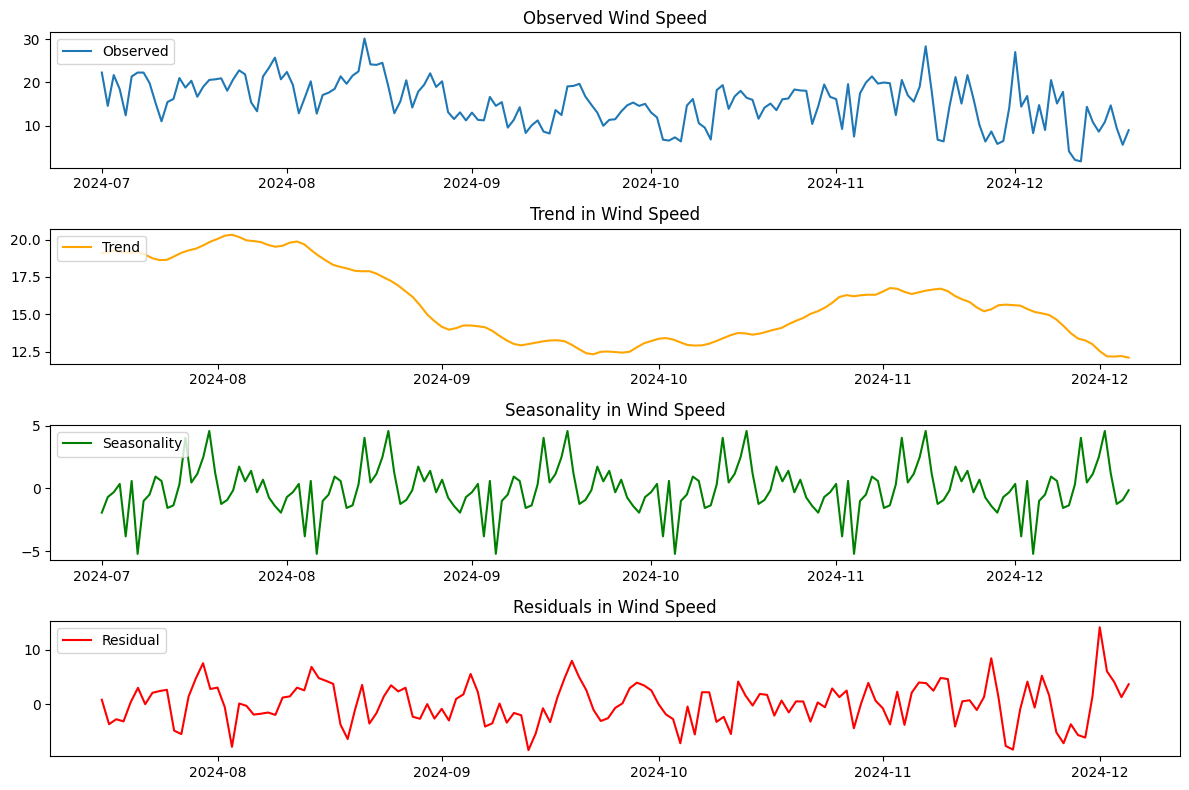

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Resample wind speed data to daily average for a smoother time series
daily_avg_wind_speed = df.resample('D', on='Time')['Wspd'].mean()

# Decompose the time series
decomposition = seasonal_decompose(daily_avg_wind_speed.dropna(), model='additive', period=30)  # Assuming monthly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Observed
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Wind Speed')
plt.legend(loc='upper left')

# Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend in Wind Speed')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality in Wind Speed')
plt.legend(loc='upper left')

# Residual
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residuals in Wind Speed')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


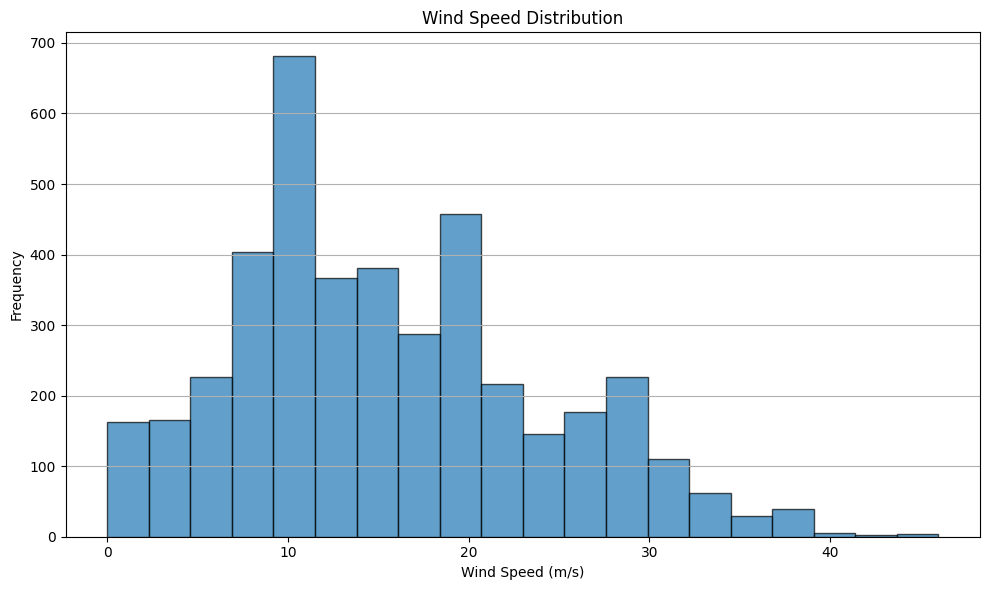

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of wind speed distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Wspd'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


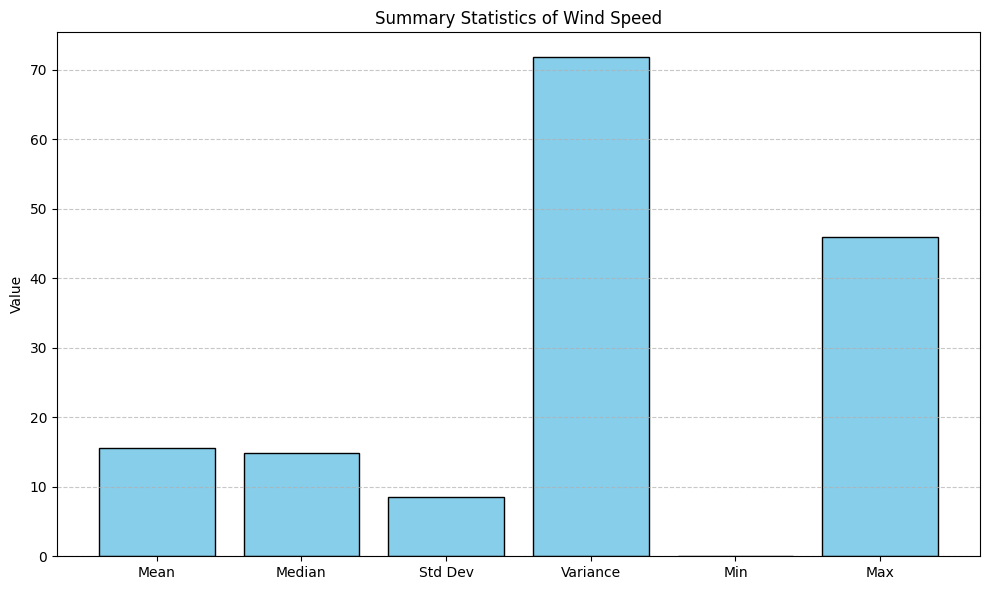

In [25]:
import matplotlib.pyplot as plt

# Calculate statistics
mean = df['Wspd'].mean()
median = df['Wspd'].median()
std_dev = df['Wspd'].std()
variance = df['Wspd'].var()
min_value = df['Wspd'].min()
max_value = df['Wspd'].max()

# Prepare data for visualization
statistics = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max']
values = [mean, median, std_dev, variance, min_value, max_value]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(statistics, values, color='skyblue', edgecolor='black')
plt.title('Summary Statistics of Wind Speed')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


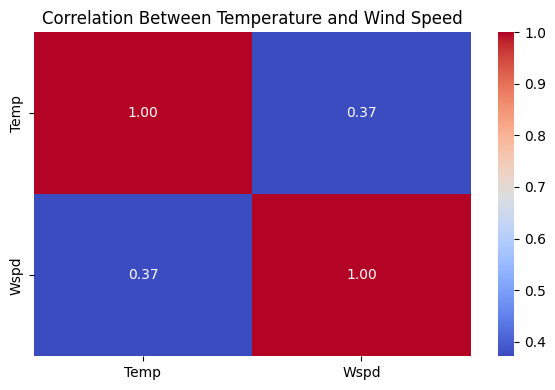

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation between temperature and wind speed using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Temp', 'Wspd']].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Between Temperature and Wind Speed')
plt.tight_layout()
plt.show()
